# 1.	Выбор начальных условий

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score
import warnings

warnings.filterwarnings("ignore")

/Users/22207865/Desktop/multi/Multimedia/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Я выбрал следующий датасет https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?select=train.csv

In [7]:
path = kagglehub.dataset_download("iabhishekofficial/mobile-price-classification")

print("Path to dataset files:", path)

100%|██████████| 70.6k/70.6k [00:00<00:00, 154kB/s]

Extracting files...
Path to dataset files: /Users/22207865/.cache/kagglehub/datasets/iabhishekofficial/mobile-price-classification/versions/1


In [8]:
!ls /Users/22207865/.cache/kagglehub/datasets/iabhishekofficial/mobile-price-classification/versions/1

test.csv  train.csv


In [2]:
df = pd.read_csv("/Users/22207865/.cache/kagglehub/datasets/iabhishekofficial/mobile-price-classification/versions/1/train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Описание фичей

- **battery_power** - Общая энергия, которую аккумулятор может хранить за один раз, измеряется в мАч.
- **blue** - Есть Bluetooth или нет
- **clock_speed** - Скорость, с которой микропроцессор выполняет инструкции
- **dual_sim** - Имеет поддержку двух SIM-карт или нет
- **fc** - Мегапиксельная передняя камера
- **four_g** - Есть 4G или нет
- **int_memory** - Внутренняя память в гигабайтах
- **m_dep** - Глубина мобильного телефона в см
- **mobile_wt** - Вес мобильного телефона
- **n_cores** - Количество ядер процессора
- **pc** - Мегапиксели основной камеры
- **px_height** - Разрешение пикселей Высота
- **px_width** - Разрешение пикселей Ширина
- **ram** - Оперативная память в мегабайтах
- **sc_h** - Экран Высота мобильного телефона в см
- **sc_w** - Ширина экрана мобильного телефона в см
- **talk_time** - максимальное время, в течение которого будет работать один заряд батареи, когда вы находитесь
- **three_g** - Есть 3G или нет
- **touch_screen** - Есть сенсорный экран или нет
- **wifi** - Есть Wi-Fi или нет
- **price_range** - Это целевая переменная со значением 0 (низкая стоимость), 1 (средняя стоимость), 2 (высокая стоимость) и 3 (очень высокая стоимость).


В данной задаче необходимо классифицировать объект (телефон), который состоит их набора характеристик по трем классам price_range со значением 0 (низкая стоимость), 1 (средняя стоимость), 2 (высокая стоимость) и 3 (очень высокая стоимость).

Довольно актуальная задача для ценообразования и выбора хорошого телефона по характеристикам.



In [4]:
target_columns = 'price_range'

X = df.drop(target_columns, axis=1)
y = df[target_columns]

In [5]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
y_train.value_counts()

price_range
1    400
0    400
3    400
2    400
Name: count, dtype: int64

In [8]:
y_test.value_counts()

price_range
3    100
1    100
0    100
2    100
Name: count, dtype: int64

Учитывая что все классы распределены равномерно и нет перевеса в пользу какого-то, то очевидным и верным решением будет использовать метрику **Accuracy**

# 2.	Создание бейзлайна и оценка качества

In [9]:
dummy_pipeline = Pipeline(steps=[
    # Классы выбираются случайно с вероятностями, соответствующими распределению классов в обучающей выборке.
    ('dummy', DummyClassifier(strategy='stratified', random_state=12))
])


dummy_pipeline.fit(X_train, y_train)
y_pred_dummy = dummy_pipeline.predict(X_test)


print("=== Байзлайн (DummyClassifier) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dummy))
print("\n\nClassification Report:\n", classification_report(y_test, y_pred_dummy))

=== Байзлайн (DummyClassifier) ===
Accuracy: 0.2575


Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.29      0.27       100
           1       0.22      0.22      0.22       100
           2       0.26      0.25      0.26       100
           3       0.28      0.27      0.28       100

    accuracy                           0.26       400
   macro avg       0.26      0.26      0.26       400
weighted avg       0.26      0.26      0.26       400



In [10]:
knn_pipeline = Pipeline(steps=[
    ('knn', KNeighborsClassifier(n_neighbors=2))
])

# Обучение модели KNN
knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)


print("=== KNN Классификатор ===")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


=== KNN Классификатор ===
Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       100
           1       0.89      0.94      0.91       100
           2       0.87      0.86      0.86       100
           3       0.98      0.88      0.93       100

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



# 3.	Улучшение бейзлайна

In [11]:
# Првоерим пустые значения
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [12]:
X_train.nunique()

battery_power     977
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1013
px_width          986
ram              1294
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
dtype: int64

Посмотрим дубликаты

In [13]:
sum(df.duplicated())

0

Добавим фичи в зависимости от других параметров:

Плотность пикселей
$$
ppi = \frac{\sqrt{px\_height^2 + px\_width^2}}{\sqrt{sc\_h^2 + sc\_w^2}}
$$

Эффективность батареи

$$
battery\_efficiency = \frac{battery\_power}{mobile\_wt}
$$

Размер экрана
$$
screen\_size = sc\_h \cdot sc\_w
$$

Оперативная на ядро
$$
ram\_per\_core = \frac{ram}{n\_cores}
$$

Общая память
$$
total\_memory = int\_memory + ram
$$



In [14]:
X_trainV2 = X_train.copy()
X_testV2 = X_test.copy()
X_trainV2["ppi"] = np.sqrt((X_train["px_height"]**2 + X_train["px_width"]**2)) / np.sqrt((X_train["sc_h"]**2 + X_train["sc_w"]**2))
X_trainV2["battery_efficiency"] = X_train["battery_power"] / X_train["mobile_wt"]
X_trainV2["screen_size"] = X_train["sc_h"] * X_train["sc_w"]
X_trainV2["ram_per_core"] = X_train["ram"] / X_train["n_cores"]
X_trainV2["total_memory"] = X_train["int_memory"] + X_train["ram"]

X_testV2["ppi"] = np.sqrt((X_test["px_height"]**2 + X_test["px_width"]**2)) / np.sqrt((X_test["sc_h"]**2 + X_test["sc_w"]**2))
X_testV2["battery_efficiency"] = X_test["battery_power"] / X_test["mobile_wt"]
X_testV2["screen_size"] = X_test["sc_h"] * X_test["sc_w"]
X_testV2["ram_per_core"] = X_test["ram"] / X_test["n_cores"]
X_testV2["total_memory"] = X_test["int_memory"] + X_test["ram"]

Статистика по фичам

In [15]:
numeric_stats = X_trainV2.select_dtypes(include=['number']).describe()

In [16]:
numeric_stats

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_w,talk_time,three_g,touch_screen,wifi,ppi,battery_efficiency,screen_size,ram_per_core,total_memory
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,...,1600.000000,1600.000000,1600.000000,1600.000000,1600.0000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,1236.665625,0.494375,1.529313,0.506875,4.322500,0.518125,32.063125,0.503563,140.102500,4.546875,...,5.778750,10.921250,0.761875,0.504375,0.5125,121.253076,9.445824,80.637500,708.905294,2157.070625
std,438.041695,0.500125,0.817696,0.500109,4.337799,0.499828,18.264382,0.289000,35.283567,2.286607,...,4.385552,5.490231,0.426069,0.500137,0.5000,71.236420,4.269225,77.607251,737.628733,1086.500705
min,502.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.0000,22.211163,2.522613,0.000000,32.250000,262.000000
25%,849.500000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,2.000000,6.000000,1.000000,0.000000,0.0000,71.149698,6.147959,18.000000,258.642857,1231.750000
50%,1222.500000,0.000000,1.500000,1.000000,3.000000,1.000000,31.500000,0.500000,141.000000,5.000000,...,5.000000,11.000000,1.000000,1.000000,1.0000,103.431749,8.848830,54.000000,466.607143,2174.000000
75%,1614.000000,1.000000,2.225000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,9.000000,16.000000,1.000000,1.000000,1.0000,150.904562,11.889007,126.000000,830.937500,3095.750000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,18.000000,20.000000,1.000000,1.000000,1.0000,493.462804,24.675000,342.000000,3978.000000,4040.000000


In [17]:
def plot_numerical_histograms(
        data,
        numerical_columns,
        n_cols=4,
        figsize=(20, 15),
        **kwargs
):
    n_plots = len(numerical_columns)
    n_rows = math.ceil(n_plots / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for idx, col in enumerate(numerical_columns):
        sns.histplot(data[col], ax=axes[idx], **kwargs)
        axes[idx].set_title(f'Гистограмма {col}', fontsize=14)
        axes[idx].set_xlabel(col, fontsize=12)
        axes[idx].set_ylabel('Частота', fontsize=12)
        axes[idx].tick_params(axis='both', which='major', labelsize=10)

    for i in range(n_plots, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

def plot_categorical_countplots(
        data,
        categorical_columns,
        n_cols=4,
        figsize=(20, 15),
        rotation=0,
        **kwargs
):
    n_plots = len(categorical_columns)
    n_rows = math.ceil(n_plots / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for idx, col in enumerate(categorical_columns):
        sns.countplot(x=data[col], ax=axes[idx], **kwargs)
        axes[idx].set_title(f'Countplot {col}', fontsize=14)
        axes[idx].set_xlabel(col, fontsize=12)
        axes[idx].set_ylabel('Частота', fontsize=12)
        axes[idx].tick_params(axis='x', rotation=rotation, labelsize=10)
        axes[idx].tick_params(axis='y', labelsize=10)

    for i in range(n_plots, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

def plot_phik_correlation_matrix(
        data,
        numerical_columns,
        vmin=0,
        vmax=1,
        color_map="Greens",
        title="Correlation φk",
        fontsize_factor=1.0,
        figsize=(14,14),
        annotate=True,
        save_path=None
):
    try:
        from phik import phik_matrix
    except ImportError:
        raise ImportError("Библиотека 'phik' не установлена. Установите её с помощью 'pip install phik'.")

    phik_overview = phik_matrix(data, interval_cols=numerical_columns)

    missing_cols = [col for col in numerical_columns if col not in phik_overview.columns]
    if missing_cols:
        raise ValueError(f"Столбцы {missing_cols} отсутствуют в данных.")

    phik_corr = phik_overview.loc[numerical_columns, numerical_columns]

    plt.figure(figsize=figsize)
    sns.heatmap(phik_corr, annot=annotate, fmt=".2f", cmap=color_map, vmin=vmin, vmax=vmax,
                xticklabels=phik_corr.columns, yticklabels=phik_corr.index)

    plt.title(title, fontsize=16 * fontsize_factor)
    plt.xticks(rotation=90, fontsize=12 * fontsize_factor)
    plt.yticks(rotation=0, fontsize=12 * fontsize_factor)
    plt.tight_layout()
    plt.show()

In [ ]:
plot_numerical_histograms(
    X_trainV2,
    list(X_trainV2.columns),
    n_cols=3,
    figsize=(15, 20),
    color='skyblue',
    kde=True
)

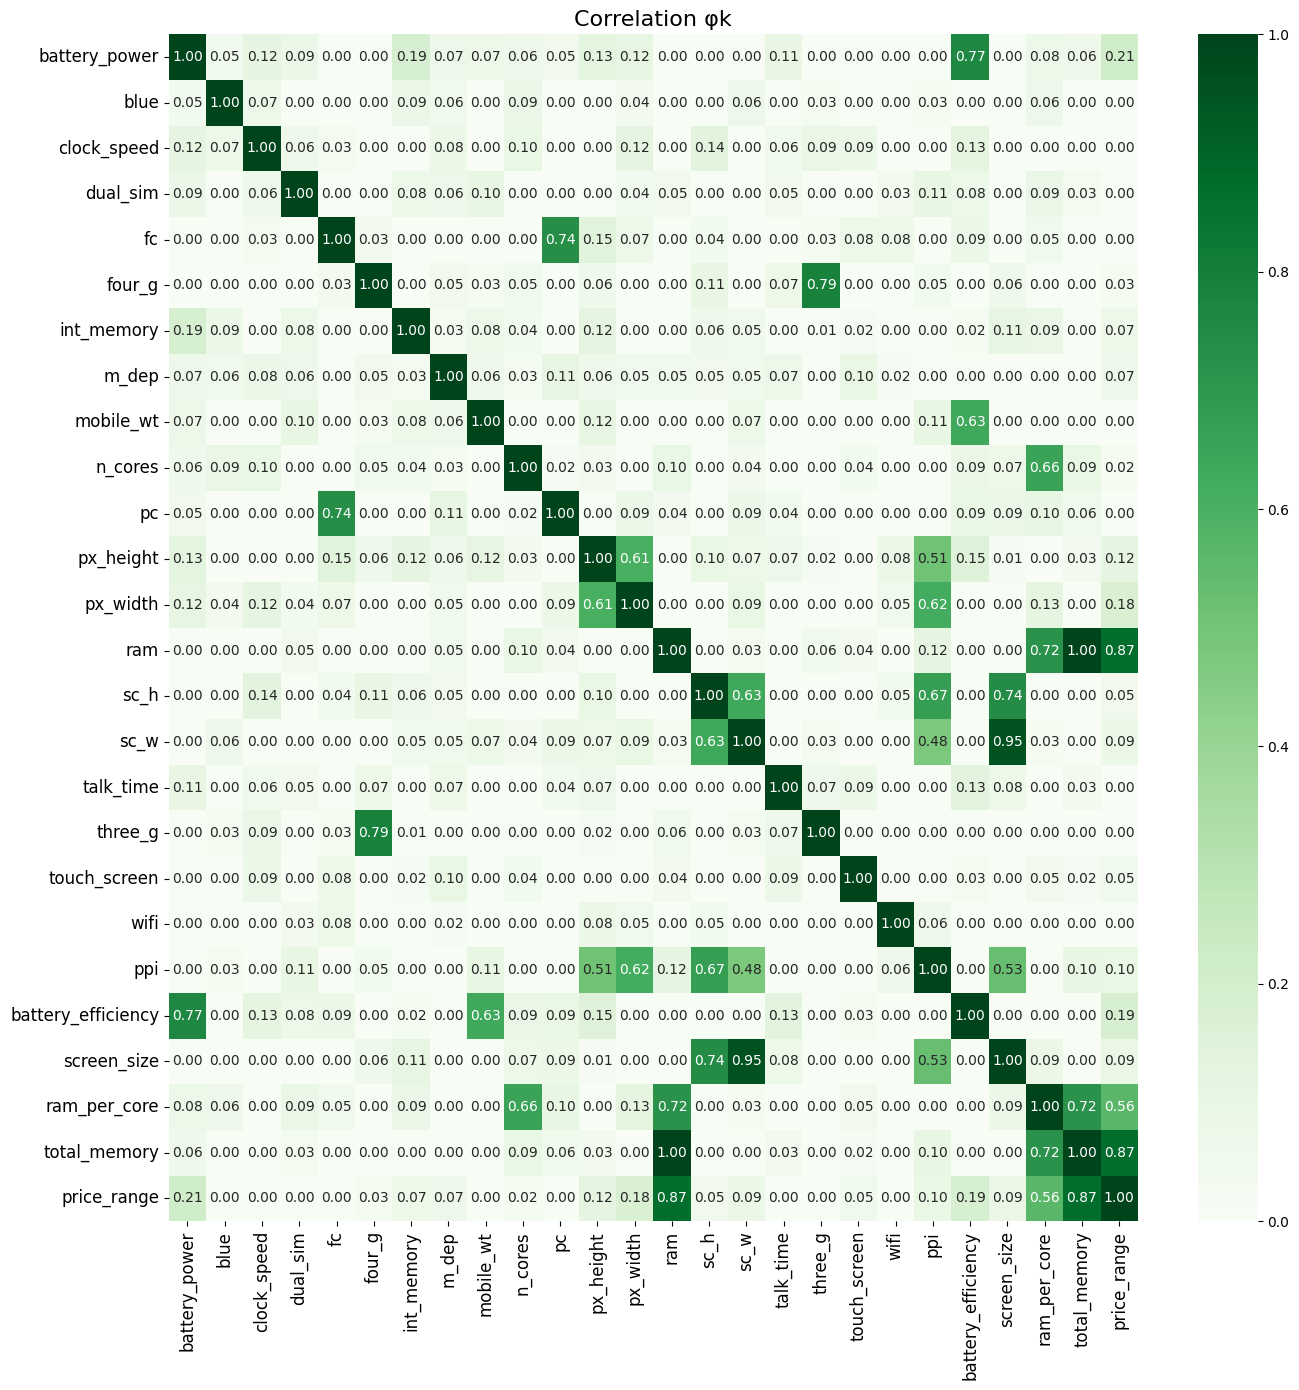

In [18]:
plot_phik_correlation_matrix(pd.concat([X_trainV2, y_train], axis=1), list(pd.concat([X_trainV2, y_train], axis=1).columns))

In [19]:
corr_df = pd.concat([X_trainV2, y_train], axis=1).corr()
bad_columns = list(corr_df[corr_df["price_range"].abs() < 0.04].index) + ["ram", "int_memory"] #"px_height", "px_width"]

Есть предположение, что если мы уберем малозначимые признаки относительно корреляции, то мы сможем улучшить качество

In [20]:
X_train_filtered = X_trainV2.drop(columns=bad_columns)
X_test_filtered = X_testV2.drop(columns=bad_columns)

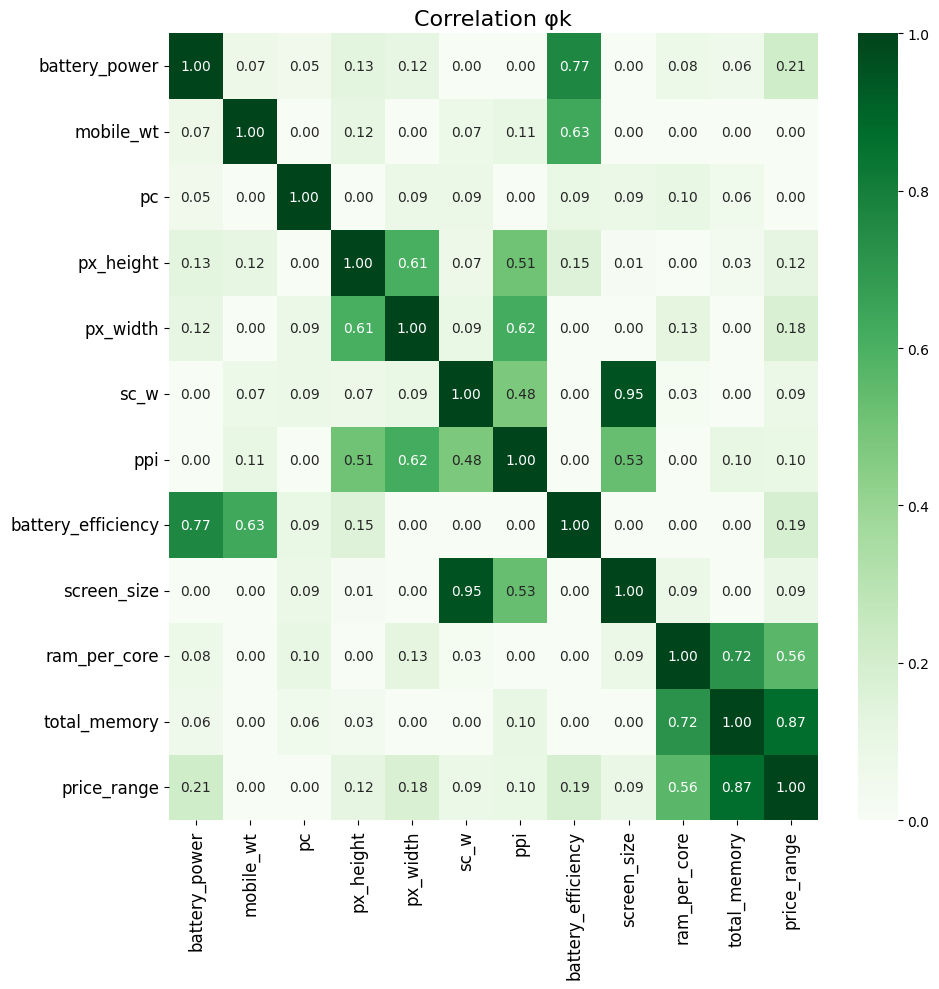

In [21]:
plot_phik_correlation_matrix(pd.concat([X_train_filtered, y_train], axis=1), list(pd.concat([X_train_filtered, y_train], axis=1).columns), figsize=(10, 10))

Обучим модель с улучшенным бейзлайном

In [22]:
pipeline = Pipeline(steps=[
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

pipeline.fit(X_train_filtered, y_train)
y_pred_knn = pipeline.predict(X_test_filtered)


print("=== KNN Классификатор ===")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


=== KNN Классификатор ===
Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       100
           1       0.90      0.92      0.91       100
           2       0.88      0.87      0.87       100
           3       0.96      0.94      0.95       100

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



Попробуем подобрать лучшие гиперпараметры

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV

param_grid = {
    'knn__n_neighbors': list(range(1, 21)),  # количество соседей от 1 до 20
    'knn__weights': ['uniform', 'distance'],  # тип весов
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']  # метрика расстояния
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # 5-кратная кросс-валидация
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_filtered, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность на кросс-валидации:", grid_search.best_score_)

y_pred = grid_search.predict(X_test_filtered)

print("\n=== Оценка модели на тестовой выборке ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Лучшие параметры: {'knn__metric': 'euclidean', 'knn__n_neighbors': 13, 'knn__weights': 'distance'}
Лучшая точность на кросс-валидации: 0.91875

=== Оценка модели на тестовой выборке ===
Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       100
           1       0.91      0.93      0.92       100
           2       0.89      0.86      0.87       100
           3       0.94      0.94      0.94       100

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



В целом получаем, что самые важные характеристики для телефона - это RAM, мощность батареи, экран, в целом это очевидно и так оно на самом деле и есть. (хотя я бы сюда добавил параметры процессора)

# 4. Своя имплементация KNN

In [23]:
import sys
from pathlib import Path

project_root = Path().resolve().parent
sys.path.append(str(project_root))

from implementations import MyKNN

In [24]:
knn_pipeline = Pipeline(steps=[
    ('knn', MyKNN(n_neighbors=2, problem_type="classification"))
])

knn_pipeline.fit(X_trainV2, y_train)
y_pred_knn = knn_pipeline.predict(X_testV2)


print("=== KNN Классификатор ===")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


=== KNN Классификатор ===
Accuracy: 0.9125
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       100
           1       0.88      0.88      0.88       100
           2       0.86      0.83      0.85       100
           3       0.94      0.95      0.95       100

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



In [25]:
knn_pipeline = Pipeline(steps=[
    ('knn', MyKNN(n_neighbors=13, problem_type="classification"))
])

knn_pipeline.fit(X_train_filtered, y_train)
y_pred_knn = knn_pipeline.predict(X_test_filtered)


print("=== KNN Классификатор ===")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


=== KNN Классификатор ===
Accuracy: 0.925
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       100
           1       0.90      0.93      0.92       100
           2       0.88      0.84      0.86       100
           3       0.93      0.94      0.94       100

    accuracy                           0.93       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.93      0.92       400



Моя имплементация схожа с результатами как и реализация KNN в sklearn.

В ходе анализа данных можно понять что некоторые признаки влияют на целевую переменную больше чем остальные